# Predicting the Auction Price of Bulldozers using Machine Learning
This project looks into various Python based machine learning and data science libraries in an attempt to build a machine learning model which is capable of predicting the auction sale price for a piece of heavy equipment 



# Problem Definition
Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozer
The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.



# Data:
The data is downloaded from the Kaggle : Blue Book for Bulldozer Competition. 

The data for this competition is split into three parts:

* Train.csv:  is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 -   April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.



# Evaluation:
The evaluation Metric for the competition is the RMSLE : Root Mean Squared Log Error between the actual and the predicted auction prices. To minimise this RMSLE error is the aim of this project



# Features:
The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

Data Dictionary given by kagle gives us the list 53 different which can be found here: https://docs.google.com/spreadsheets/d/11Y32g_OIVqnj5U5Rn6hkro3juiK_LKWQWjjBChgXtMA/edit?usp=sharing

In [43]:
# importing ncessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline 

## Exploratory Data Analysis

In [90]:
# import the train and validation sets
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory =False)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

There are 53 columns and 412698 rows, with many missing data

In [92]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

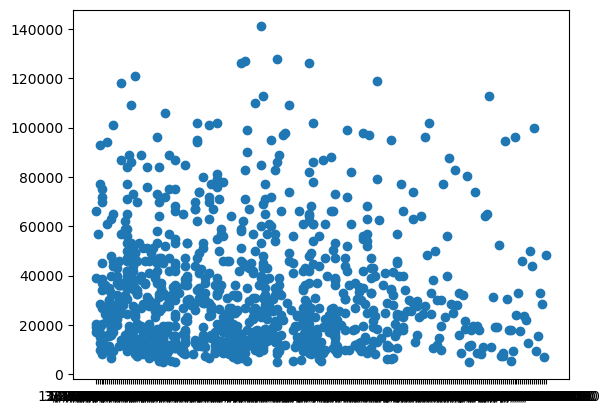

In [93]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);
# the first 1000 rows

 the x axis is full of dates which makes it unreadable to read

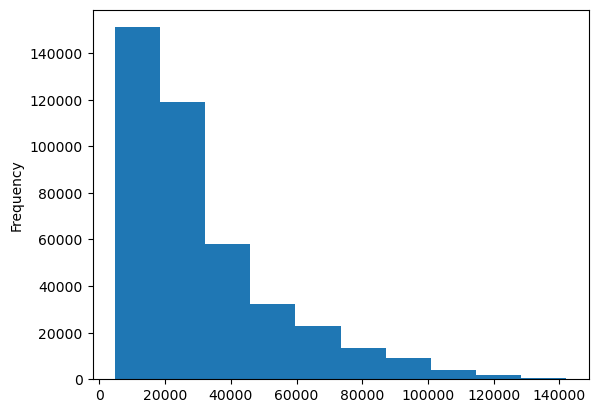

In [6]:
df.SalePrice.plot.hist();

Most cost less than 30K USD

In [7]:
# parse dates
df.saledate.dtype

dtype('O')

In [8]:
df.saledate.head()

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

In [9]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory =False,
                parse_dates=["saledate"])

In [89]:
df.saledate.dtype 

dtype('<M8[ns]')

This is a datetime64[ns] datatype

parsing converts objet to date time datatype

In [11]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

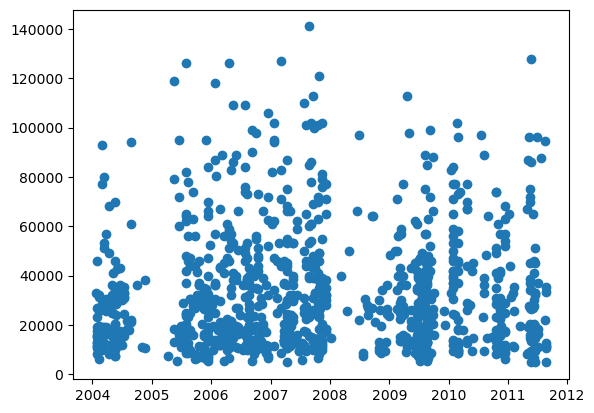

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);
# the first 1000 rows

We now get a more clear data, We find that the places where there are some gaps such as in 2005 and 2008, are during times of recession or martket downtim

Since SalesPrice is our target variable it can be good to see its relation with other columns

In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort Dataframe By saledate

Because it is a time series data, it needs to belike that to predict the future


In [14]:
df_tmp=df.copy()
df_tmp.sort_values(by = ["saledate"], inplace =True, ascending =True)
df_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add other datetime parameters from the  saledate column for better usage

In [15]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [16]:
df_tmp.head().T.tail()

,205615,274835,141296,212552,62755
saleYear,1989,1989,1989,1989,1989
saleMonth,1,1,1,1,1
saleDay,17,31,31,31,31
saleDayofweek,1,1,1,1,1
saleDayofyear,17,31,31,31,31


### Value Counts of various columns

#### State counts

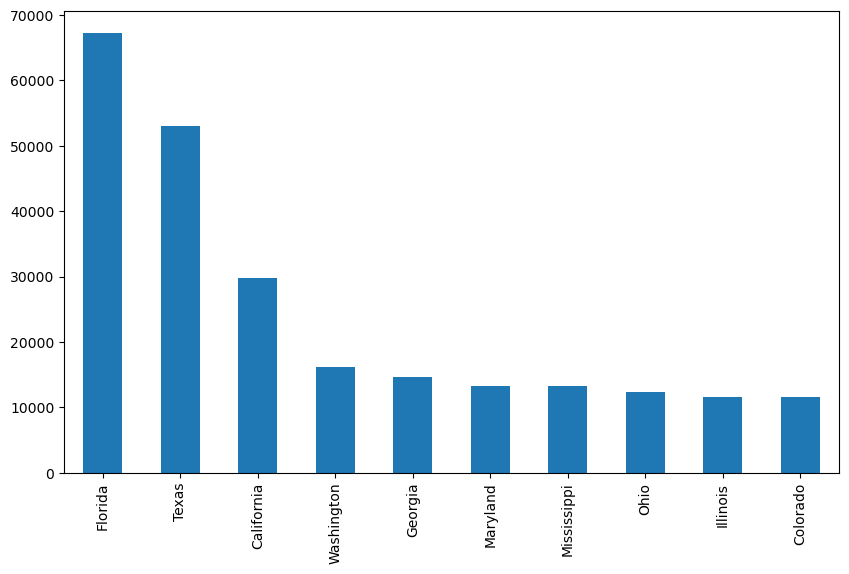

In [17]:
df_tmp.state.value_counts().head(10).plot(kind= "bar",figsize =(10,6));


#### ModelID Counts

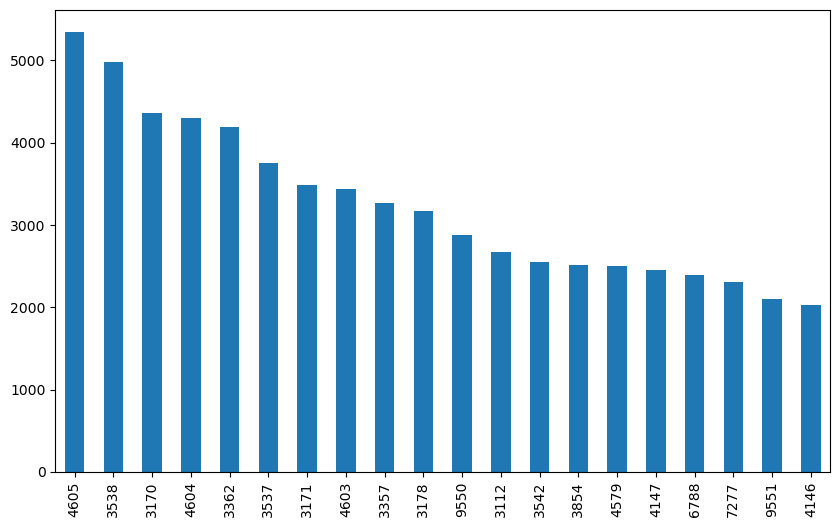

In [18]:
df_tmp.ModelID.value_counts().head(20).plot(kind= "bar",figsize =(10,6));

#### Year made
Here 1000 means default value ie no value available

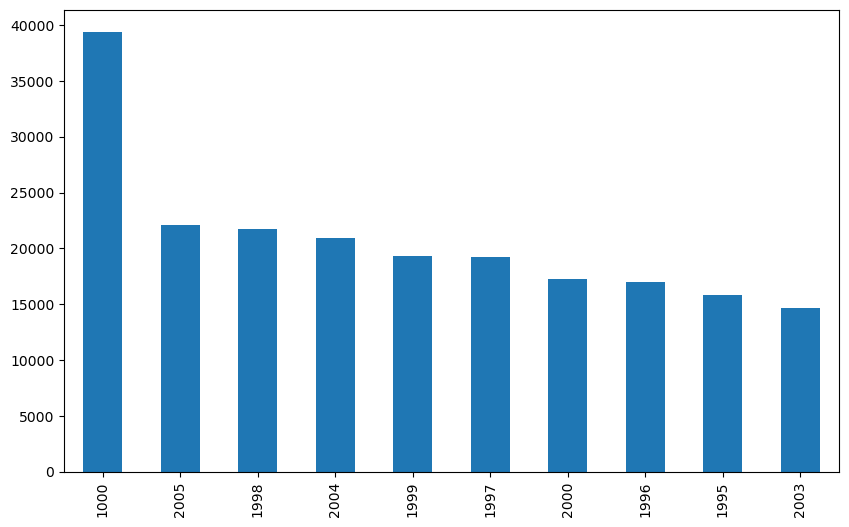

In [20]:
df_tmp.YearMade.value_counts( ).head(10).plot(kind= "bar",figsize =(10,6));


#### Product Size

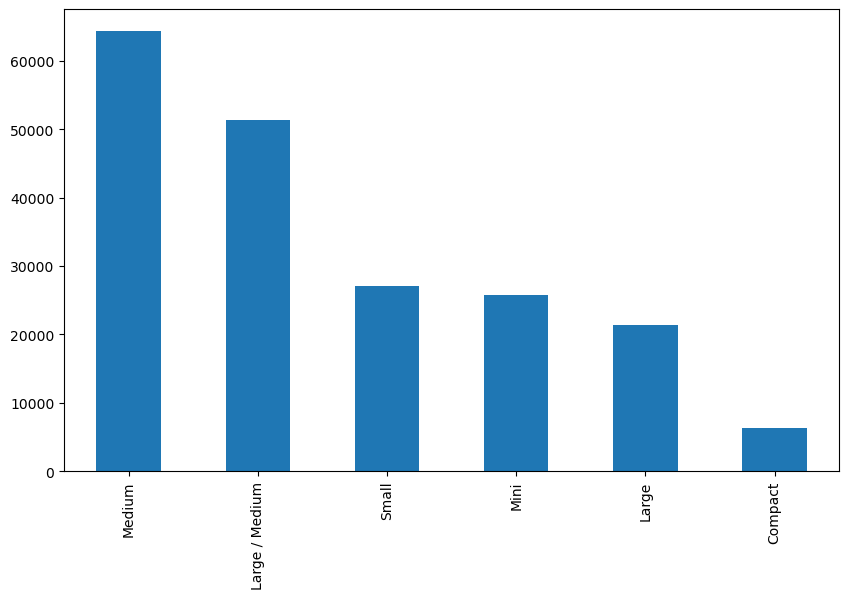

In [21]:
df_tmp.ProductSize.value_counts( ).plot(kind= "bar",figsize =(10,6));


#### Product Group

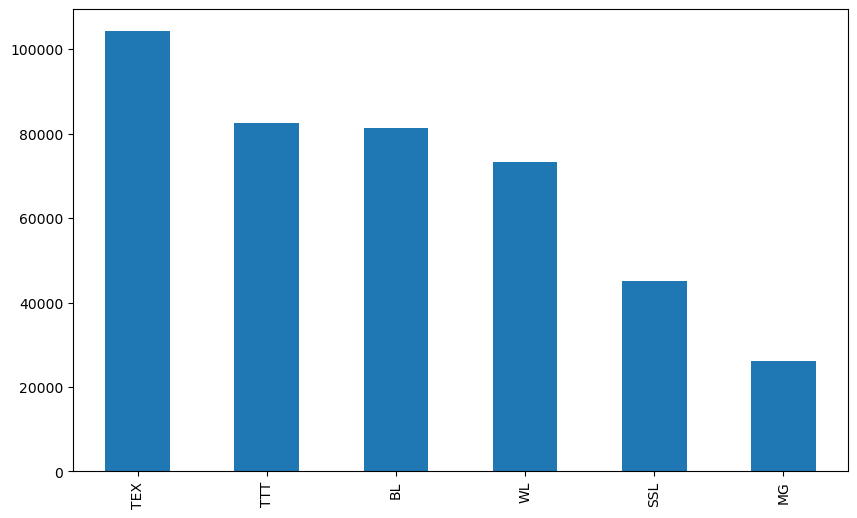

In [22]:
df_tmp.ProductGroup.value_counts( ).plot(kind= "bar",figsize =(10,6));


#### Product Group Description

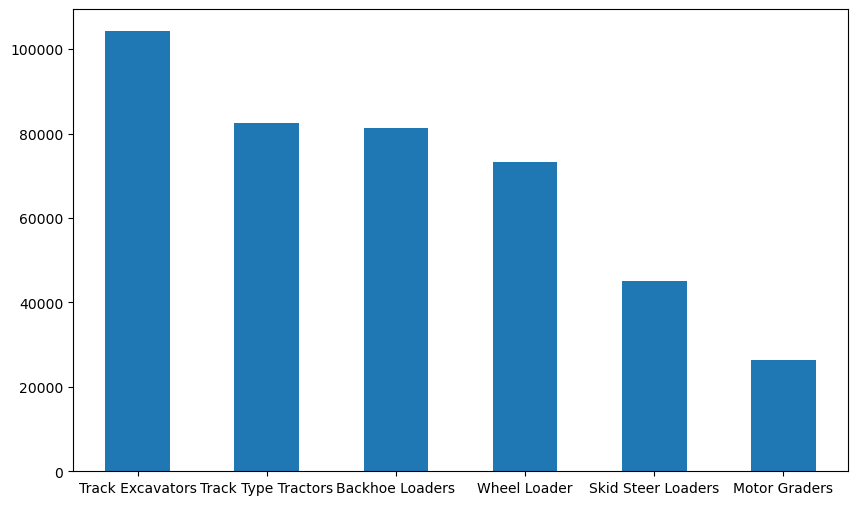

In [23]:
df_tmp.ProductGroupDesc.value_counts( ).plot(kind= "bar",figsize =(10,6));
plt.xticks(rotation=0);

#### Stick

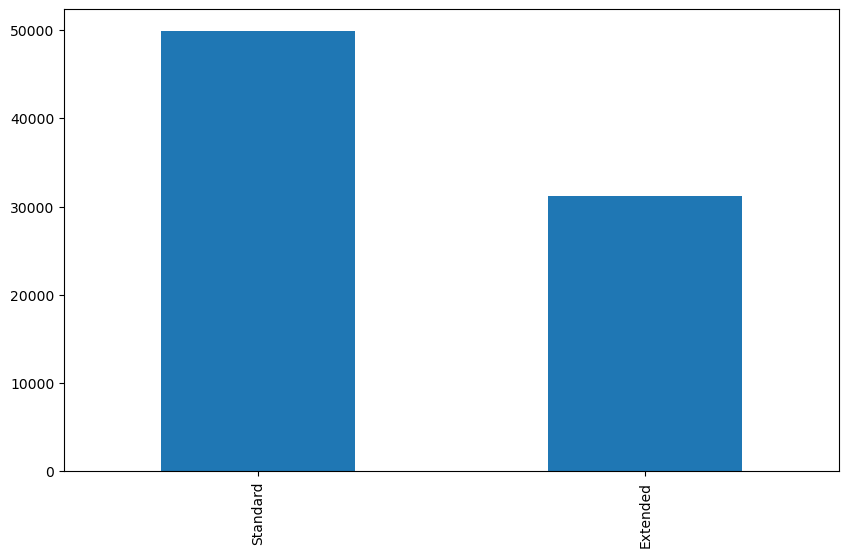

In [24]:
df_tmp.Stick.value_counts( ).plot(kind= "bar",figsize =(10,6));

#### Track Type

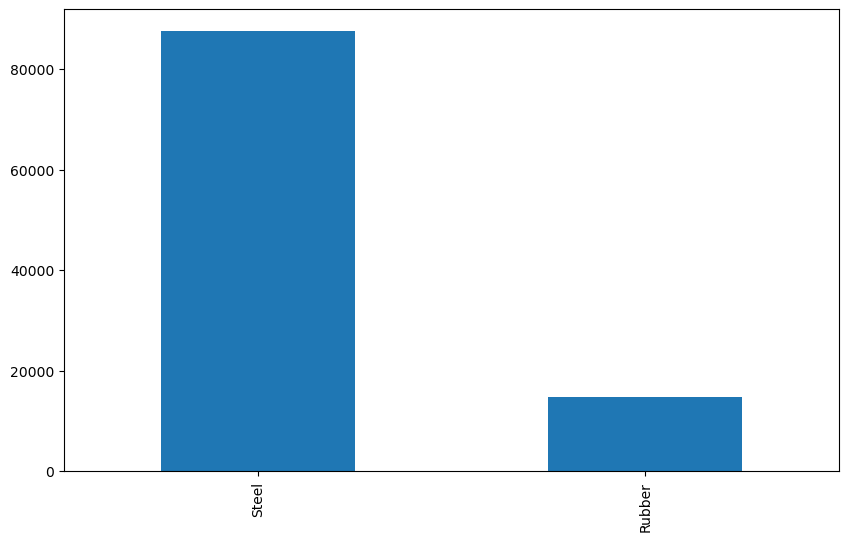

In [25]:
df_tmp.Track_Type.value_counts( ).plot(kind= "bar",figsize =(10,6));

#### Transmission Vlaue

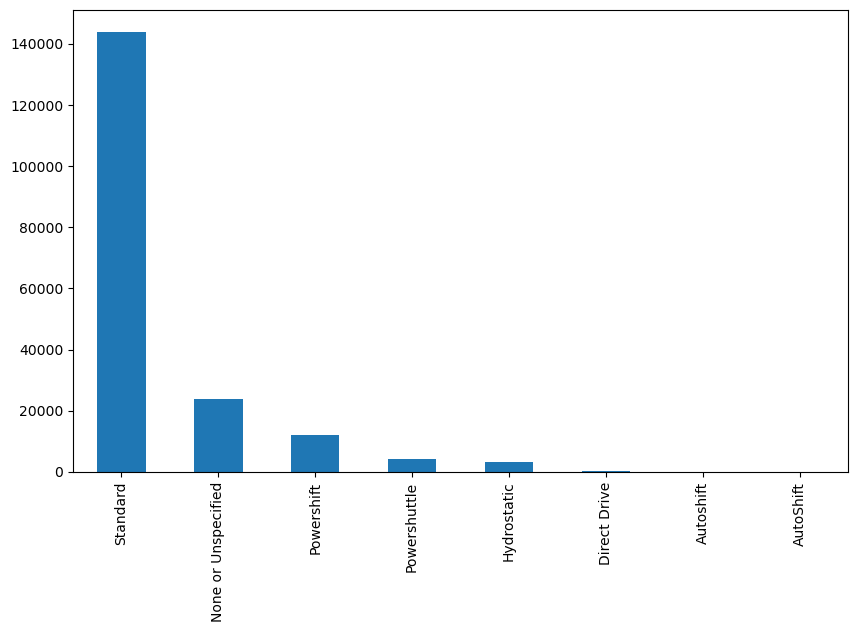

In [26]:
df_tmp.Transmission.value_counts( ).plot(kind= "bar",figsize =(10,6));

#### Tire Size

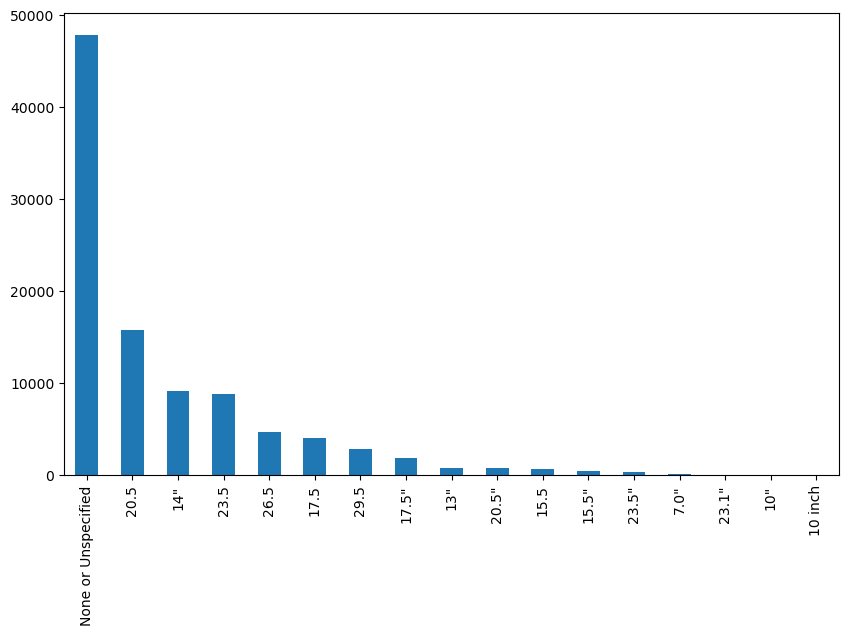

In [27]:
df_tmp.Tire_Size.value_counts( ).plot(kind= "bar",figsize =(10,6));

#### Sale Year

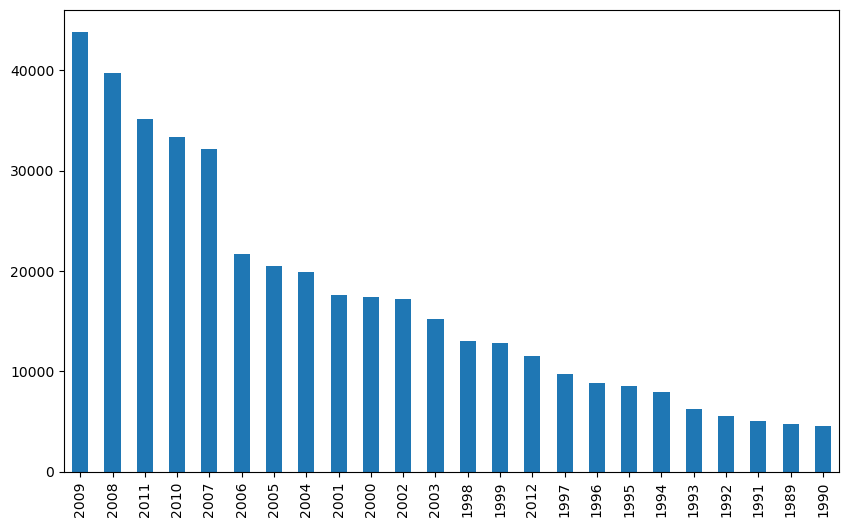

In [28]:
df_tmp.saleYear.value_counts( ).plot(kind= "bar",figsize =(10,6));

#### Sale month

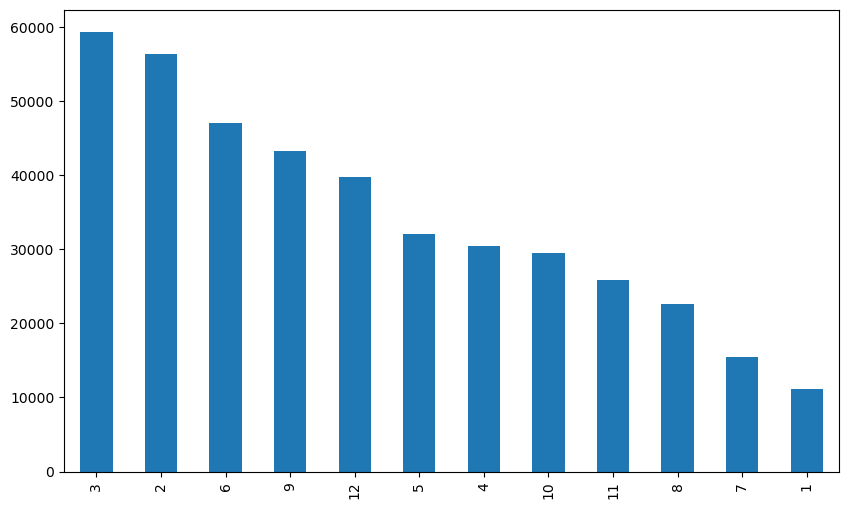

In [29]:
df_tmp.saleMonth.value_counts( ).plot(kind= "bar",figsize =(10,6));

We can see that the Months before and after the end of ficical year have the highest number of sales

#### Sale Day

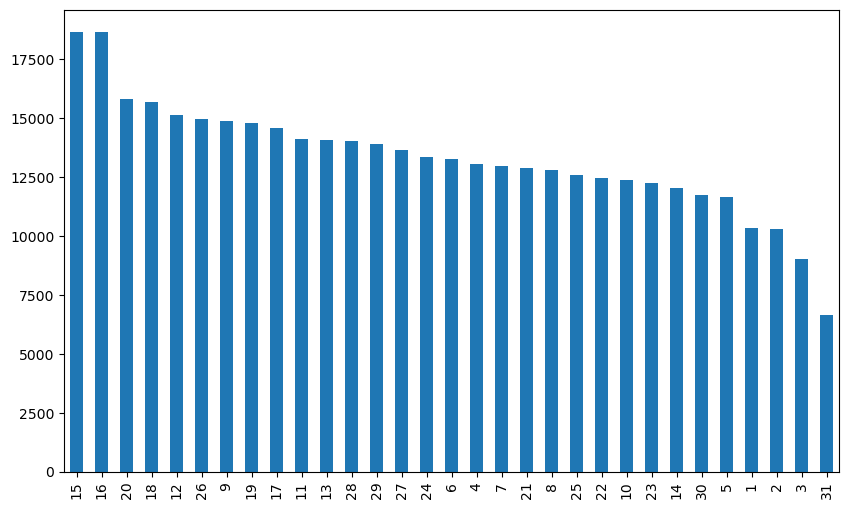

In [30]:
df_tmp.saleDay.value_counts( ).plot(kind= "bar",figsize =(10,6));

We see that Sales peaks at the middle of teh month rather than at the start or the end of the month

#### Sale Day

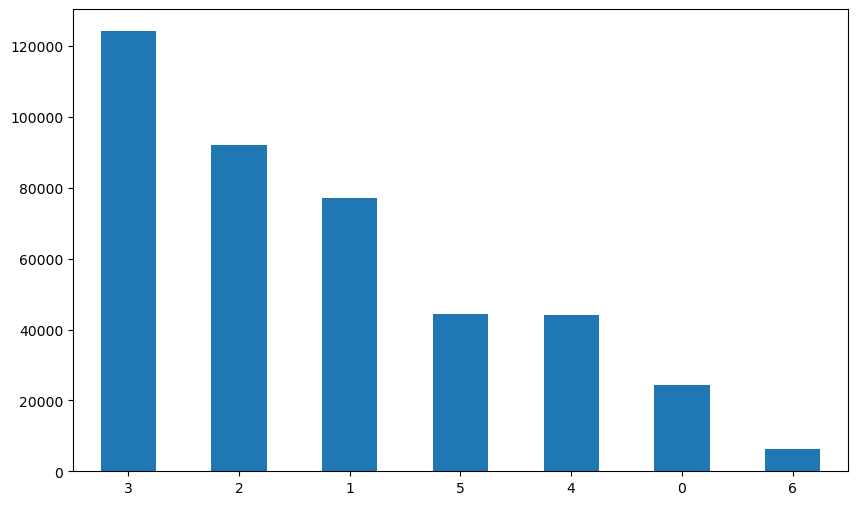

In [31]:
df_tmp.saleDayofweek.value_counts( ).plot(kind= "bar",figsize =(10,6))
plt.xticks(rotation=0);

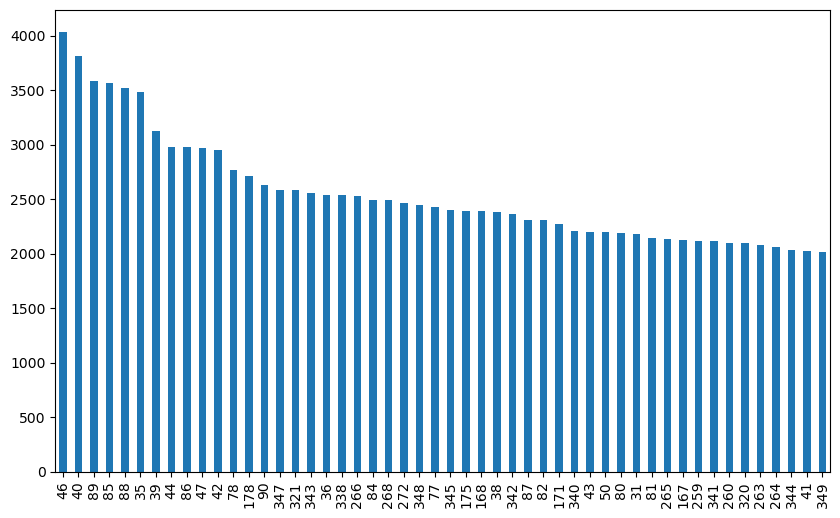

In [32]:
df_tmp.saleDayofyear.value_counts( ).head(50).plot(kind= "bar",figsize =(10,6));

# Cleaning the data
The above rough man made plots only give very less information, for more information.

Even if we want for model driven EDA we need all values to be numerical and there should be no missing values, we need to clean the data
Convering non numeric data into categories 

In [33]:
# Convert Strings into Categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

Now they are all numbers; Now missing data

In [34]:
df_tmp.isna().sum()/len(df_tmp) *100
# column fraction of missing data

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [35]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())

In [36]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1     

In [37]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [38]:
df_tmp.isna().sum()
## ALL are zero

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [39]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

# 5.Modeling

Splitting data into training and validation sets
rows upto 2011 - Train sets
afterwards     - validation set

In [40]:
x_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
x_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an Evaluation metric

It uses RMSLE metric:but sklearn doesnt have this metric, it has mean squred log error though.

In [41]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(x_train, y_train),
              "Valid R^2": model.score(x_valid, y_valid)}
    return scores

### Training Model 
it has 400k samples, implies longer training time,
we now use on smaller subset about 10k for hyperparameter tuning

In [45]:
# Change max samples in RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)
model.fit(x_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [46]:
show_scores(model)

{'Training MAE': 5556.221431922717,
 'Valid MAE': 7152.7230623001815,
 'Training RMSLE': 0.2575727815593556,
 'Valid RMSLE': 0.2919562350078472,
 'Training R^2': 0.8605497832027421,
 'Valid R^2': 0.832188608213883}

### Hyper Parameter Tuning using RandomisedSearchCV

In [47]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=200,
                              cv=5,
                              verbose=True)
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
d:\Bulldozer_Prices_Prediction\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

CPU times: total: 43min 5s
Wall time: 1h 12s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=200,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [68]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [69]:
show_scores(rs_model)

{'Training MAE': 5837.280465341332,
 'Valid MAE': 7413.620138954429,
 'Training RMSLE': 0.26748110710843953,
 'Valid RMSLE': 0.29857706550398627,
 'Training R^2': 0.8446789241898119,
 'Valid R^2': 0.8147325544309352}

We do get an improvement but it might not be the best case scenario

### On using n_iterations= 1000 and running for 5 hours we get the following hyperparameters as ideal
* n_estimators=90,
* min_samples_leaf=1,
* min_samples_split=14,
* max_features=0.5,
* n_jobs=-1,
* max_samples=None

In [70]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(x_train, y_train)

CPU times: total: 11min 50s
Wall time: 1min 6s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [71]:
show_scores(ideal_model)

{'Training MAE': 2926.6950108113933,
 'Valid MAE': 5916.49242791997,
 'Training RMSLE': 0.14331001082165254,
 'Valid RMSLE': 0.24438339490820524,
 'Training R^2': 0.9597361279618606,
 'Valid R^2': 0.8830422394097175}

In [115]:
%%time
# More Ideal model
best_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
best_model.fit(x_train, y_train)

CPU times: total: 5min 12s
Wall time: 31.5 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [116]:
show_scores(best_model)

{'Training MAE': 2543.704866353214,
 'Valid MAE': 5916.117158169881,
 'Training RMSLE': 0.12939493688020887,
 'Valid RMSLE': 0.2432115486845839,
 'Training R^2': 0.9671480646023807,
 'Valid R^2': 0.8815915449613608}

In [121]:
metric=[show_scores(model),show_scores(rs_model),show_scores(ideal_model),show_scores(best_model)]

In [122]:
index= {0: "model", 1: "rs_model",2: "ideal_model",3:"best_model"}

In [123]:
metrics_df = pd.DataFrame.from_dict(metric)
metrics_df =metrics_df.rename(index = index)

In [124]:
metrics_df

,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2
model,5556.221432,7152.723062,0.257573,0.291956,0.860550,0.832189
rs_model,5837.280465,7413.620139,0.267481,0.298577,0.844679,0.814733
ideal_model,2926.695011,5916.492428,0.143310,0.244383,0.959736,0.883042
best_model,2543.704866,5916.117158,0.129395,0.243212,0.967148,0.881592


### Make Predictions on test data

In [74]:
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


#### Preprocess the data

In [76]:
def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1    
        if label == "auctioneerID":
            df["auctioneerID_is_missing"] = False
            df[label] = pd.Categorical(content).codes+1
        # found an error stating that auctioneerID_is_missing should be in the same order as the set under fit
    
    return df

In [77]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,4,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,4,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,4,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,4,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,4,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [78]:
x_train.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [80]:
test_preds = ideal_model.predict(df_test)

In [81]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,17409.515135
1,1227844,15232.598376
2,1227847,46628.859594
3,1227848,67666.935944
4,1227863,57191.727910
...,...,...
12452,6643171,38368.509992
12453,6643173,11202.004632
12454,6643184,13426.884460
12455,6643186,16075.213583


In [82]:
df_preds.to_csv("bluebook-for-bulldozers_predicitons.csv",
                index=False)

### Feature Importance

In [83]:
ideal_model.feature_importances_

array([3.45750758e-02, 1.96318551e-02, 4.67664671e-02, 1.64871288e-03,
       3.34271574e-03, 2.04104363e-01, 3.08884488e-03, 1.04521699e-03,
       4.26047662e-02, 5.03428778e-02, 6.23609673e-02, 4.54380547e-03,
       1.47235487e-02, 1.56669992e-01, 4.13739318e-02, 5.93218273e-03,
       3.46452542e-03, 4.74130854e-03, 3.38747347e-03, 6.09034458e-02,
       1.05256061e-03, 3.71800350e-05, 9.23216563e-04, 3.27585142e-04,
       1.71197112e-03, 2.10649332e-04, 9.62548176e-04, 4.22771861e-03,
       2.71300352e-03, 1.28929176e-03, 4.55476661e-03, 2.63534297e-03,
       3.40913049e-03, 1.13638887e-03, 2.38474009e-03, 7.25104796e-03,
       1.03534612e-03, 1.44363067e-02, 2.79505628e-03, 1.42361164e-03,
       1.07614867e-03, 8.35070043e-04, 1.12175404e-03, 5.94495697e-04,
       4.84969332e-04, 3.61645382e-04, 4.03226828e-04, 2.24406044e-03,
       1.07382038e-03, 2.80675116e-04, 2.88900609e-04, 7.32377299e-02,
       3.81330264e-03, 5.65416325e-03, 2.91936696e-03, 9.86447708e-03,
      

In [84]:
import seaborn as sns

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")


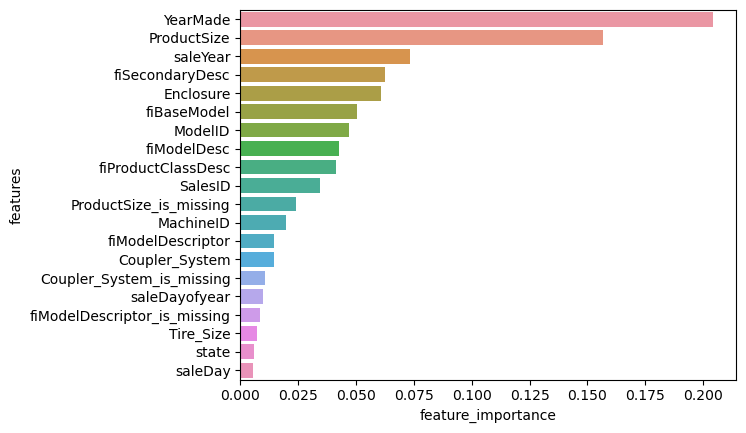

In [85]:
plot_features(x_train.columns, ideal_model.feature_importances_)


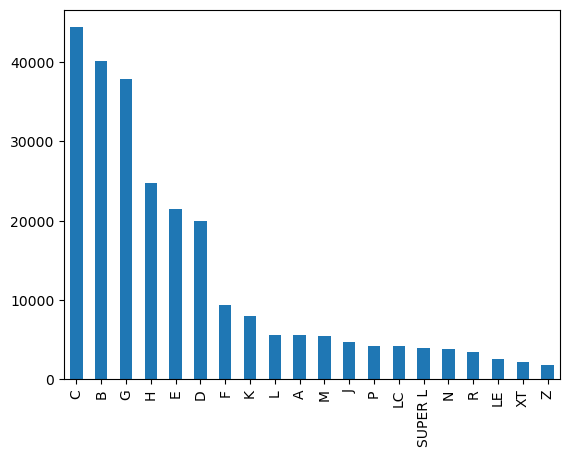

In [125]:
df.fiSecondaryDesc.value_counts().head(20).plot(kind="bar");

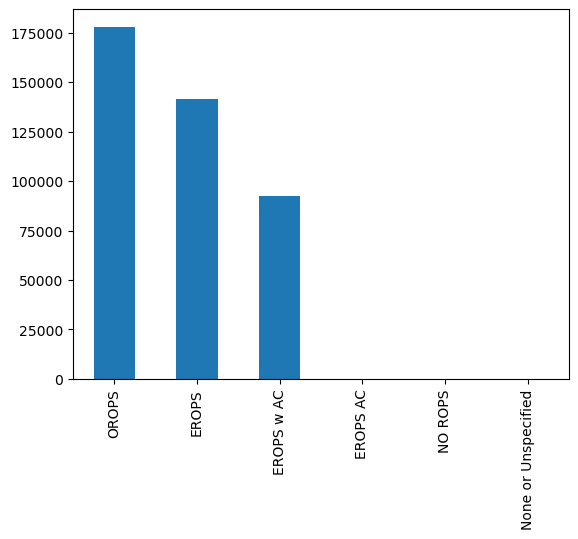

In [126]:
df.Enclosure.value_counts().plot(kind="bar");